<a href="https://colab.research.google.com/github/mohamedghaly1/SEE-Assessment-Task-Posture-Monitoring/blob/main/Technical_Development_Task_Posture_Monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Technical Development Task**

Objective:
Analyze a set of images of a fitness coach performing different exercises (standing, squatting
empty-handed, and holding weights). Estimate the load distribution across key body parts
(arms, legs, hips, and chest) based on the given data and exercise posture.


## Download and Preprocess the Images

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Refrences of the Images taken

*   https://www.youtube.com/watch?v=Kt1mEQu6Kdg
*   https://www.youtube.com/watch?v=KeoeSilbWO8



Visualizing and Resizing the Images

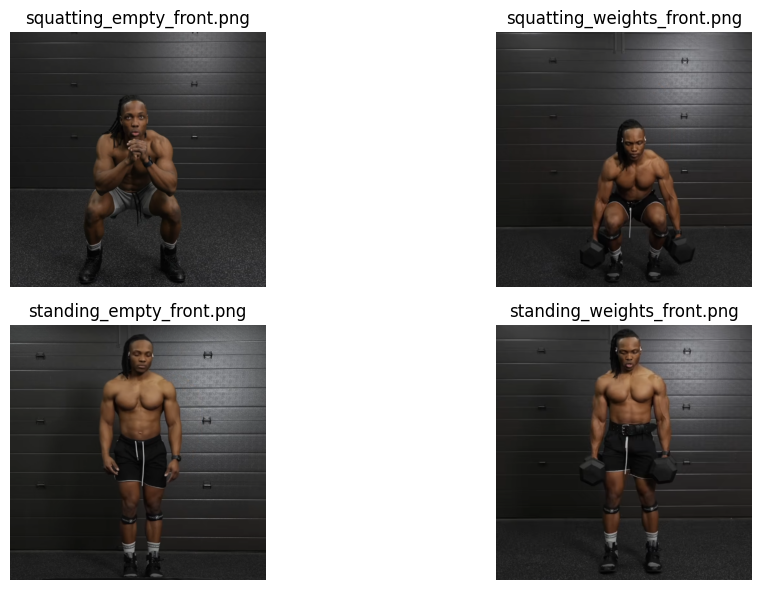

In [2]:
import cv2
import matplotlib.pyplot as plt
import os

# Path to your dataset folder
img_dir = '/content/drive/MyDrive/Task1DS'

# Desired image size
IMG_SIZE = (512, 512)

# Dictionary to hold images
images = {}

# Step 3: Load and resize images
for filename in sorted(os.listdir(img_dir)):
    if filename.endswith('.png'):
        path = os.path.join(img_dir, filename)
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, IMG_SIZE)
        images[filename] = img

# Step 4: Display all images
plt.figure(figsize=(12, 6))
for i, (name, img) in enumerate(images.items()):
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(name)
    plt.axis('off')
plt.tight_layout()
plt.show()


## Pose Estimation

Installing the ultralytics to use the YOLO Pose Model

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

Testing the YOLO POSE working correctly in analyzing the images

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.52M/6.52M [00:00<00:00, 91.9MB/s]



image 1/1 /content/drive/MyDrive/Task1DS/squatting_empty_front.png: 608x640 1 person, 437.9ms
Speed: 8.5ms preprocess, 437.9ms inference, 30.8ms postprocess per image at shape (1, 3, 608, 640)


array([[[38, 38, 38],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [45, 45, 45],
        [45, 45, 45],
        [45, 45, 45]],

       [[38, 38, 38],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [48, 48, 48]],

       [[38, 38, 38],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [48, 48, 48]],

       ...,

       [[39, 39, 39],
        [38, 38, 38],
        [47, 47, 47],
        ...,
        [45, 43, 43],
        [45, 43, 43],
        [44, 42, 42]],

       [[43, 43, 43],
        [41, 41, 41],
        [52, 52, 52],
        ...,
        [44, 42, 42],
        [45, 43, 43],
        [43, 40, 41]],

       [[38, 39, 39],
        [37, 37, 37],
        [46, 46, 46],
        ...,
        [44, 42, 42],
        [45, 43, 43],
        [43, 41, 41]]], dtype=uint8)
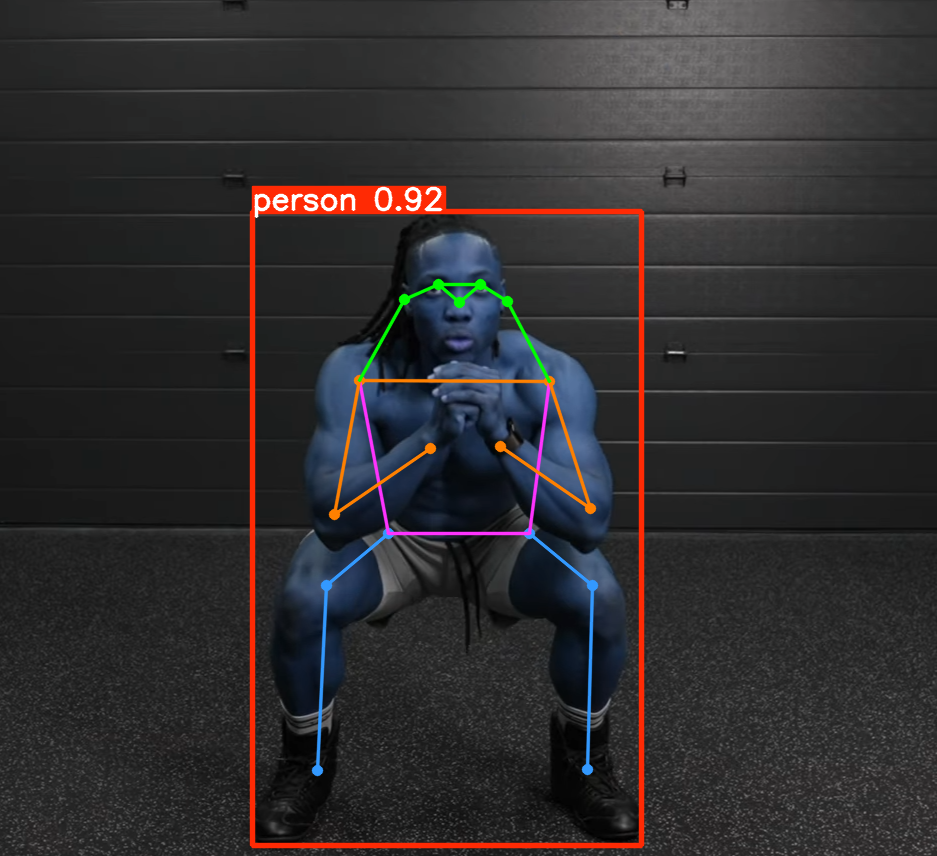

In [4]:
from ultralytics import YOLO
model = YOLO('yolov8n-pose.pt')
results = model('/content/drive/MyDrive/Task1DS/squatting_empty_front.png')
results[0].plot()


Getting different key point from each image

In [5]:
keypoints_data = {}

for filename, img in images.items():
    results = model(img)
    if results and results[0].keypoints:
        keypoints = results[0].keypoints.xy[0].cpu().numpy()  # (17, 2) x,y coordinates
        keypoints_data[filename] = keypoints



0: 640x640 1 person, 329.5ms
Speed: 13.8ms preprocess, 329.5ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 288.6ms
Speed: 7.7ms preprocess, 288.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 257.6ms
Speed: 10.8ms preprocess, 257.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 286.9ms
Speed: 22.1ms preprocess, 286.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Printing the Key points from each image

**0: nose
1: left_eye
2: right_eye
3: left_ear
4: right_ear
5: left_shoulder
6: right_shoulder
7: left_elbow
8: right_elbow
9: left_wrist
10: right_wrist
11: left_hip
12: right_hip
13: left_knee
14: right_knee
15: left_ankle
16: right_ankle**

In [12]:
print("Total images processed:", len(keypoints_data))

for i, (filename, kps) in enumerate(keypoints_data.items()):
    print(f"\nFilename: {filename}")
    print("Keypoints (x, y):")
    print(kps)
    if i == 3:
        break

Total images processed: 4

Filename: squatting_empty_front.png
Keypoints (x, y):
[[      251.4       185.9]
 [     261.17      175.74]
 [     240.96       175.4]
 [     274.24      182.14]
 [     223.93      181.22]
 [     298.13      226.88]
 [     197.47      226.13]
 [     323.15      301.84]
 [     181.29      304.15]
 [     279.52      267.78]
 [     235.35      265.92]
 [     288.06      320.94]
 [     212.54         321]
 [     321.11      352.54]
 [      175.1       352.3]
 [     323.53      459.25]
 [     168.69      458.15]]

Filename: squatting_weights_front.png
Keypoints (x, y):
[[     278.24      233.13]
 [     286.54      222.21]
 [     267.23       223.3]
 [     298.86      221.67]
 [     247.68      224.61]
 [     316.96      260.77]
 [     231.79      265.16]
 [     351.16      332.23]
 [     209.37      337.41]
 [     355.71      395.89]
 [     201.51      401.06]
 [     302.21      343.13]
 [     245.19      345.22]
 [     318.41      369.79]
 [     232.12      370.3

## Biomechanical Analysis

Define Constants and Joint Angle Computation

In [13]:
BODY_WEIGHT = 60  # kg
TOTAL_WEIGHT = 11  # kg, 5.5 kg in each hand
ARM_WEIGHT = 5.5  # kg
HEIGHT = 170  # cm

def compute_joint_angle(p1, p2, p3):
    """Calculate angle at point p2 formed by vectors p2p1 and p2p3"""
    from numpy.linalg import norm
    import numpy as np
    v1, v2 = p1 - p2, p3 - p2
    cos_theta = np.dot(v1, v2) / (norm(v1) * norm(v2) + 1e-6)
    angle = np.arccos(np.clip(cos_theta, -1, 1))
    return np.degrees(angle)

Calculate Load Distribution

In [20]:
load_distribution = {}

for filename, kps in keypoints_data.items():

    left_shoulder, right_shoulder = kps[5], kps[6]
    left_elbow, right_elbow = kps[7], kps[8]
    left_wrist, right_wrist = kps[9], kps[10]

    left_hip, right_hip = kps[11], kps[12]
    left_knee, right_knee = kps[13], kps[14]
    left_ankle, right_ankle = kps[15], kps[16]

    left_arm_angle = compute_joint_angle(left_shoulder, left_elbow, left_wrist)
    right_arm_angle = compute_joint_angle(right_shoulder, right_elbow, right_wrist)
    avg_arm_angle = (left_arm_angle + right_arm_angle) / 2

    left_knee_angle = compute_joint_angle(left_hip, left_knee, left_ankle)
    right_knee_angle = compute_joint_angle(right_hip, right_knee, right_ankle)
    avg_knee_angle = (left_knee_angle + right_knee_angle) / 2

    left_hip_angle = compute_joint_angle(left_shoulder, left_hip, left_knee)
    right_hip_angle = compute_joint_angle(right_shoulder, right_hip, right_knee)
    avg_hip_angle = (left_hip_angle + right_hip_angle) / 2

    holding_weights = 'weights' in filename.lower()

    if holding_weights:
        arm_load = ARM_WEIGHT + TOTAL_WEIGHT * (1 - avg_arm_angle / 180)
    else:
        arm_load = 0


    knee_load_factor = (180 - avg_knee_angle) / 180
    leg_load = BODY_WEIGHT + (TOTAL_WEIGHT if holding_weights else 0)
    knee_load = leg_load * (0.5 + 0.5 * knee_load_factor)
    ankle_load = leg_load - knee_load


    hip_load = leg_load * (1 - knee_load_factor * 0.4)

    upper_body_weight = BODY_WEIGHT * 0.6
    chest_load = upper_body_weight + (TOTAL_WEIGHT if holding_weights else 0) * 0.8

    load_distribution[filename] = {
        'Arms (kg)': round(arm_load, 2),
        'Knees (kg)': round(knee_load, 2),
        'Ankles (kg)': round(ankle_load, 2),
        'Hips (kg)': round(hip_load, 2),
        'Chest (kg)': round(chest_load, 2),
        # 'Avg Knee Angle (deg)': round(avg_knee_angle, 1),
        # 'Avg Arm Angle (deg)': round(avg_arm_angle, 1),
        # 'Avg Hip Angle (deg)': round(avg_hip_angle, 1)
    }


## Defining Key Metrics, Visualization, and Reporting

Reporting

In [24]:
def summary_report(load_distribution):
    report = ""
    report += "=== Load Distribution Summary ===\n\n"
    report += "Assumptions:\n"
    report += "- Static poses assumed.\n"
    report += "- Uniform body weight distribution unless posture indicates otherwise.\n"
    report += "- Arm weight fixed at 5.5 kg per arm; total external weight 11 kg when holding weights.\n"
    report += "- Body weight = 60 kg, height = 170 cm, age = 58 years.\n\n"

    for filename, loads in load_distribution.items():
        report += f"Image: {filename}\n"
        total_load = sum(loads.values())
        report += f"Total Load Calculated: {total_load:.2f} kg\n"
        for part, val in loads.items():
            pct = (val / total_load) * 100 if total_load > 0 else 0
            report += f"  {part}: {val} kg ({pct:.1f}%)\n"
        report += "\n"

    # Comparison
    report += "=== Comparison Between Postures ===\n"
    standing = [k for k in load_distribution if 'standing' in k.lower()]
    squat = [k for k in load_distribution if 'squat' in k.lower()]
    weights = [k for k in load_distribution if 'weights' in k.lower()]

    def avg_load(parts):
        sums = {key: 0 for key in ['Arms (kg)', 'Knees (kg)', 'Ankles (kg)', 'Hips (kg)', 'Chest (kg)']}
        for img in parts:
            for key in sums:
                sums[key] += load_distribution[img][key]
        n = len(parts)
        return {k: (v / n if n > 0 else 0) for k, v in sums.items()}

    standing_avg = avg_load(standing)
    squat_avg = avg_load(squat)
    weights_avg = avg_load(weights)

    report += "Average Loads (kg) - Standing:\n"
    for k, v in standing_avg.items():
        report += f"  {k}: {v:.2f}\n"
    report += "\nAverage Loads (kg) - Squatting:\n"
    for k, v in squat_avg.items():
        report += f"  {k}: {v:.2f}\n"
    report += "\nAverage Loads (kg) - Holding Weights:\n"
    for k, v in weights_avg.items():
        report += f"  {k}: {v:.2f}\n"

    report += "\nObservations:\n"
    report += "- Arm load significantly increases when holding weights.\n"
    report += "- Knee load increases during squats compared to standing.\n"
    report += "- Hip load shows variation based on knee angle and posture.\n"
    report += "- Chest load increases when supporting additional weight.\n"

    return report

summary = summary_report(load_distribution)
print(summary)


=== Load Distribution Summary ===

Assumptions:
- Static poses assumed.
- Uniform body weight distribution unless posture indicates otherwise.
- Arm weight fixed at 5.5 kg per arm; total external weight 11 kg when holding weights.
- Body weight = 60 kg, height = 170 cm, age = 58 years.

Image: squatting_empty_front.png
Total Load Calculated: 149.89 kg
  Arms (kg): 0 kg (0.0%)
  Knees (kg): 37.63999938964844 kg (25.1%)
  Ankles (kg): 22.360000610351562 kg (14.9%)
  Hips (kg): 53.88999938964844 kg (36.0%)
  Chest (kg): 36.0 kg (24.0%)

Image: squatting_weights_front.png
Total Load Calculated: 188.76 kg
  Arms (kg): 6.46999979019165 kg (3.4%)
  Knees (kg): 41.13999938964844 kg (21.8%)
  Ankles (kg): 29.860000610351562 kg (15.8%)
  Hips (kg): 66.48999786376953 kg (35.2%)
  Chest (kg): 44.8 kg (23.7%)

Image: standing_empty_front.png
Total Load Calculated: 155.85 kg
  Arms (kg): 0 kg (0.0%)
  Knees (kg): 30.190000534057617 kg (19.4%)
  Ankles (kg): 29.809999465942383 kg (19.1%)
  Hips (kg):

Visualization

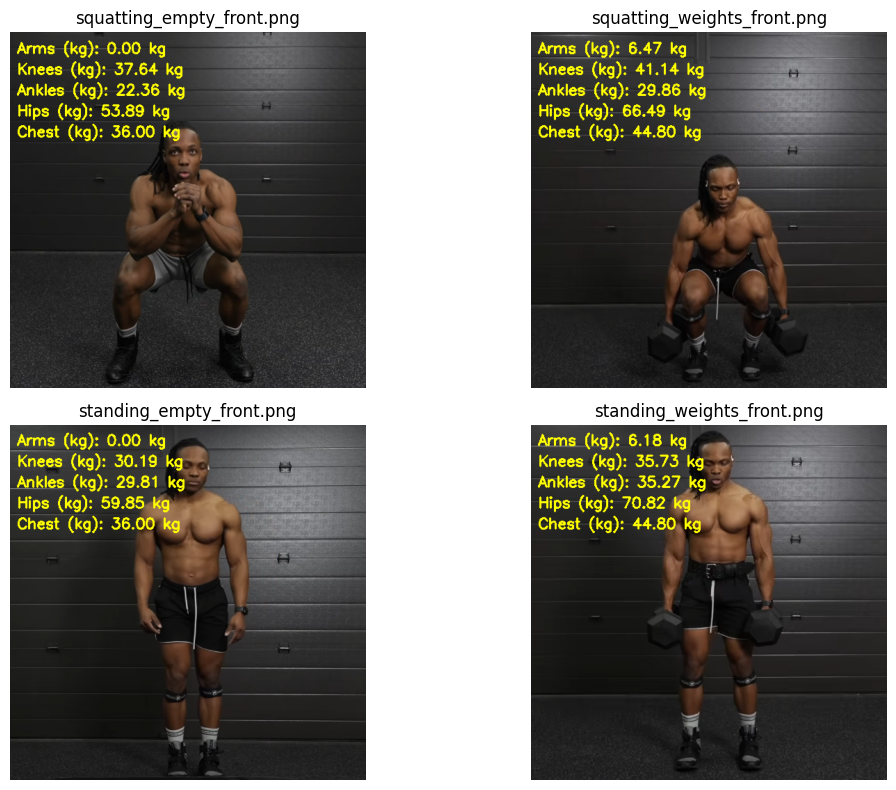

In [22]:
import cv2

def overlay_loads_on_image(image, loads):
    img = image.copy()
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    positions = {
        'Arms (kg)': (10, 30),
        'Knees (kg)': (10, 60),
        'Ankles (kg)': (10, 90),
        'Hips (kg)': (10, 120),
        'Chest (kg)': (10, 150),
    }

    for part, pos in positions.items():
        text = f"{part}: {loads[part]:.2f} kg"
        cv2.putText(img, text, pos, cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
plt.figure(figsize=(12, 8))
for i, (filename, loads) in enumerate(load_distribution.items()):
    img = images[filename]
    img_with_load = overlay_loads_on_image(img, loads)
    plt.subplot(2, 2, i+1)
    plt.imshow(img_with_load)
    plt.title(filename)
    plt.axis('off')

plt.tight_layout()
plt.show()
